In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
%config Completer.use_jedi = False
%matplotlib inline

In [173]:
df_titanic = pd.read_csv('titanic.csv', usecols = ["pclass", "sex", "age", "sibsp", "parch", "fare","survived"])
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [174]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [175]:
# Age is having missing data
# Let's calculate the percentage of the missing data age have

age_missing_percent = df_titanic['age'].isnull().sum()/len(df_titanic)*100
round(age_missing_percent,2)

19.87

In [176]:
df_titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [177]:
# Let's check the age of the passengers between 0 and 1

more_than_0 = df_titanic['age'] > 0
less_than_1 = df_titanic['age'] < 1
df_titanic[more_than_0 & less_than_1]

,survived,pclass,sex,age,sibsp,parch,fare
78,1,2,male,0.83,0,2,29.0000
305,1,1,male,0.92,1,2,151.5500
469,1,3,female,0.75,2,1,19.2583
644,1,3,female,0.75,2,1,19.2583
755,1,2,male,0.67,1,1,14.5000
803,1,3,male,0.42,0,1,8.5167
831,1,2,male,0.83,1,1,18.7500


In [178]:
# Here we detect 2 problems
# 1. Min age is 0.42 which cannot be someones age -> Replace it with 1
# 2. 19% of data is missing -> Impute with best possible solutions (Mean and Median are same so we will using Median as the missing values)

df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())
df_titanic['age'] = np.where(((df_titanic['age'] > 0) & (df_titanic['age'] < 1)),1,df_titanic['age'])
df_titanic['age'] = df_titanic['age'].astype('int')

In [179]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    int32  
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 45.4+ KB


In [180]:
# Let's change the column types as per data definition
# survived can be changed categorical
# pclass can be changed to categorical
# sex need to changed to categorical from object
# fare can be rounded off to 2 decimal points
#df_titanic['survived'] = df_titanic['survived'].astype('category')
#df_titanic['pclass'] = df_titanic['pclass'].astype('category')
#df_titanic['sex'] = df_titanic['sex'].astype('str')

le = LabelEncoder()
df_titanic['sex'] = le.fit_transform(df_titanic['sex'].astype(str))

df_titanic['fare'] = round(df_titanic['fare'],2)

In [181]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int32  
 3   age       891 non-null    int32  
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.9 KB


In [182]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,1,22,1,0,7.25
1,1,1,0,38,1,0,71.28
2,1,3,0,26,0,0,7.92
3,1,1,0,35,1,0,53.10
4,0,3,1,35,0,0,8.05


In [183]:
X = df_titanic.iloc[:,1:]
y = df_titanic['survived']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (712, 6)
Shape of X_test: (179, 6)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [185]:
clf = DecisionTreeClassifier()
model = clf.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(f'Accuracy of Train Data: {clf.score(X_train, y_train)}')
print(f'Accuracy of Test Data: {clf.score(X_test, y_test)}')

Accuracy of Train Data: 0.9817415730337079
Accuracy of Test Data: 0.8156424581005587


In [194]:
confusion_matrix(y_test,y_predict)

array([[89, 14],
       [19, 57]], dtype=int64)

In [253]:
# Clearly we have overfitting data here
# Let's optmise the model

parameters = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(3,20,1),
    'criterion': ['gini','entropy'],
    'min_samples_leaf': range(2,10,1),
    'min_samples_split': range(1,10,1),   
}

grid_search = GridSearchCV(estimator= model, param_grid= parameters, cv = 5, n_jobs= -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=14,
                                              min_samples_leaf=2,
                                              min_samples_split=7,
                                              splitter='random'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 20),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(1, 10)})

In [254]:
print(f'Selected Best Params: {grid_search.best_params_}')
print(f'Best Score Achieved: {grid_search.best_score_}')

Selected Best Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best Score Achieved: 0.8230473751600511


In [256]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 3, min_samples_split= 3)
model.fit(X_train,y_train)
grid_search_train_score = model.score(X_train, y_train)
print(f'Train Score is: {grid_search_train_score}')
grid_search_test_score = model.score(X_test, y_test)
print(f'Test Score is: {grid_search_test_score}')

Train Score is: 0.8960674157303371
Test Score is: 0.8268156424581006


In [257]:
# Still we can see there is some overfitting
# Let's perform Post Pruning


path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.        , 0.00014045, 0.00015605, 0.00026166,
       0.00031211, 0.00036116, 0.00039018, 0.00046816, 0.00046816,
       0.00052669, 0.0005875 , 0.00061076, 0.00063841, 0.00066274,
       0.00068097, 0.00068097, 0.00078027, 0.00080257, 0.00082697,
       0.00083601, 0.00085121, 0.00090943, 0.00092403, 0.00092604,
       0.00094269, 0.00109238, 0.00115241, 0.00123767, 0.0012697 ,
       0.00134647, 0.00142561, 0.00144462, 0.00146623, 0.00156055,
       0.00199992, 0.0027476 , 0.00276705, 0.00322142, 0.00357946,
       0.00360723, 0.00511536, 0.01053557, 0.01196503, 0.01513108,
       0.03392969, 0.13044564])

In [258]:
clfs= []

for i in ccp_alphas:    
    model_ccp = DecisionTreeClassifier(ccp_alpha = i)
    model_ccp.fit(X_train, y_train)
    clfs.append(model_ccp)

In [259]:
train_score = [clf.score(X_train, y_train) for clf in clfs]
test_score = [clf.score(X_test, y_test) for clf in clfs]

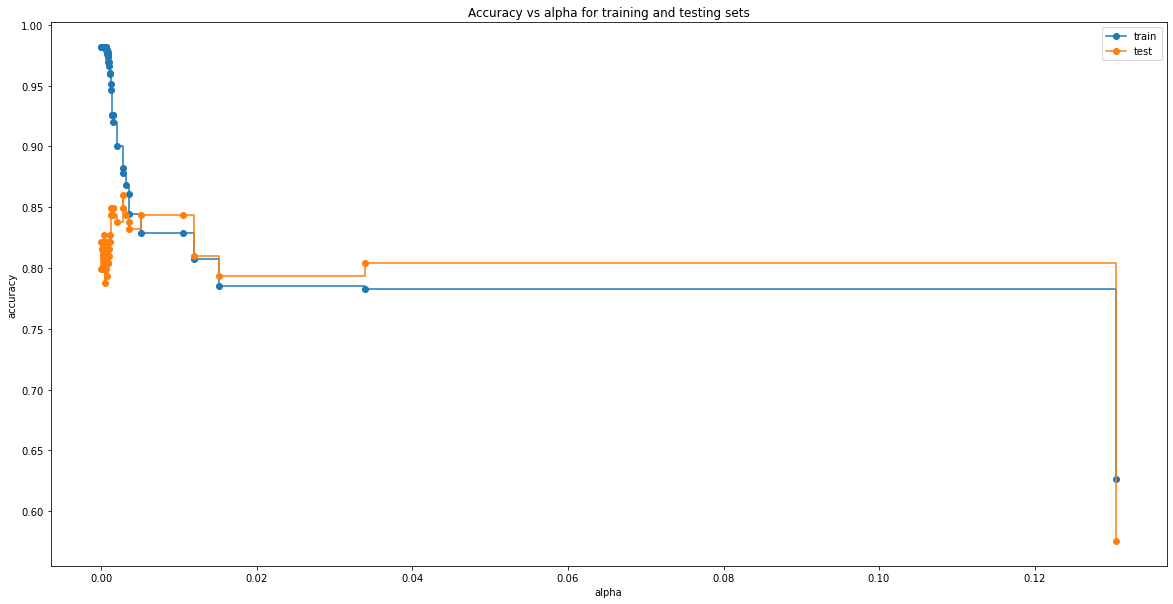

In [260]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker='o', label="train",
        drawstyle="steps-post", )
ax.plot(ccp_alphas, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [273]:
model_final = DecisionTreeClassifier(criterion= 'entropy', max_depth= 14, min_samples_leaf= 2, min_samples_split= 7, ccp_alpha= 0.007)
model_final.fit(X_train,y_train)
final_train_score = model_final.score(X_train, y_train)
print(f'Train Score is: {final_train_score}')
final_test_score = model_final.score(X_test, y_test)
print(f'Test Score is: {final_test_score}')

Train Score is: 0.8216292134831461
Test Score is: 0.8268156424581006


In [274]:
final_pred = model_final.predict(X_test)

In [275]:
confusion_matrix(y_test, final_pred)

array([[91, 12],
       [19, 57]], dtype=int64)